# Import necessary modules/libraries

In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 487.6 kB/s eta 0:00:07
      --------------------------------------- 0.0/3.0 MB 487.6 kB/s eta 0:00:07
      --------------------------------------- 0.1/3.0 MB 393.8 kB/s eta 0:00:08
     - -------------------------------------- 0.1/3.0 MB 420.8 kB/s eta 0:00:07
     - -------------------------------------- 0.1/3.0 MB 420.8 kB/s eta 0:00:07
     - -------------------------------------- 0.1/3.0 MB 448.2 kB/s eta 0:00:07
     -- ------------------------------------- 0.2/3.0 MB 625.1 kB/s eta 0:00:05
     --- ------------------------------------ 0.2/3.0 MB 625.8 kB/s eta 0:00:05
     --- ------------------------------------ 0.3/3.0 MB 561.1 kB/s eta 0:00:05
     --- ------------------------------------ 0.3/3.0 MB 570.1 kB/s eta 0:00:05
     ----- ---------------------------------- 0.4/3.0 MB 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download historical stock data for a ticker (e.g., Apple - AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440332  6.455078  6.391279  6.422878  493729600
2010-01-05  6.451465  6.487878  6.417459  6.458085  601904800
2010-01-06  6.348846  6.477045  6.342226  6.451466  552160000
2010-01-07  6.337109  6.379843  6.291066  6.372319  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328683  447610800


# Feature Engineering

In [2]:
# Create a lag feature: previous day's closing price
data['Prev_Close'] = data['Close'].shift(1)

# Create moving averages (technical indicators)
data['MA10'] = data['Close'].rolling(window=10).mean()  # 10-day moving average
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average

# Remove rows with NaN values (from rolling computations and shifting)
data = data.dropna()
print(data.head())


Price          Close      High       Low      Open     Volume Prev_Close  \
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL              
Date                                                                       
2010-03-16  6.754508  6.770457  6.696126  6.746382  446908000   6.736151   
2010-03-17  6.744576  6.814694  6.718997  6.768049  450956800   6.754508   
2010-03-18  6.760528  6.771060  6.699136  6.743975  342109600   6.744576   
2010-03-19  6.688302  6.778282  6.657606  6.764740  559445600   6.760528   
2010-03-22  6.763536  6.801154  6.625106  6.634736  456419600   6.688302   

Price           MA10      MA50  
Ticker                          
Date                            
2010-03-16  6.639610  6.228093  
2010-03-17  6.684119  6.234178  
2010-03-18  6.726069  6.240359  
2010-03-19  6.736000  6.247148  
2010-03-22  6.753063  6.255677  


# Target variables

In [3]:
# Define the features and target variable
features = ['Prev_Close', 'MA10', 'MA50']
target = 'Close'
X = data[features]
y = data[target]


In [4]:
# Time-based train-test split
train_size = int(len(data) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [5]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 7.854678287552266


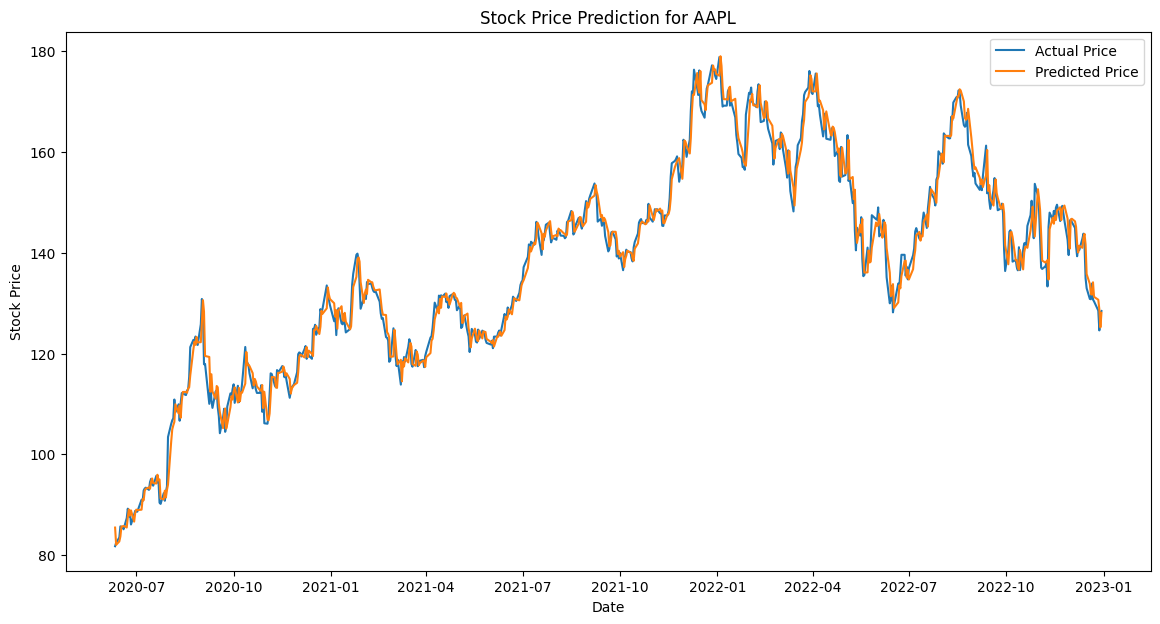

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size:], y_test, label='Actual Price')
plt.plot(data.index[train_size:], predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Prediction for {ticker}')
plt.legend()
plt.show()


# Advanced price prediction using LSTM

In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31251 (122.07 KB)
Trainable params: 31251 (122.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50

72/72

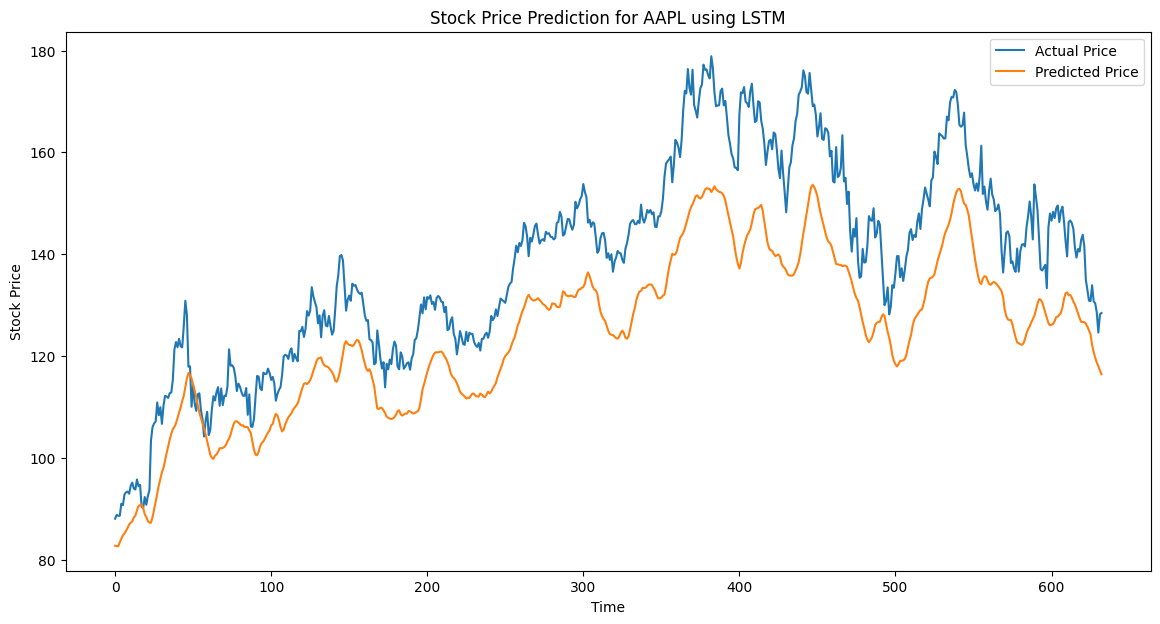

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Download historical stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# 2. Feature Engineering
# Create a lag feature: previous day's closing price
data['Prev_Close'] = data['Close'].shift(1)

# Create moving averages
data['MA10'] = data['Close'].rolling(window=10).mean()  # 10-day moving average
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average

# Function to compute RSI (Relative Strength Index)
def compute_rsi(series, window=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    avg_gain = up.rolling(window=window, min_periods=window).mean()
    avg_loss = down.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data['Close'], window=14)

# Remove rows with missing values due to shifting and rolling calculations
data = data.dropna()

# 3. Prepare the Dataset
# Select features and target variable
features = ['Prev_Close', 'MA10', 'MA50', 'RSI']
target = 'Close'
dataset = data[features + [target]].copy()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

# Function to create sequences for LSTM: using past `seq_length` days to predict next day's price
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :-1])  # all features except target
        y.append(data[i, -1])  # target variable (Close)
    return np.array(X), np.array(y)

seq_length = 60  # Using the past 60 days
X, y = create_sequences(scaled_data, seq_length)

# Time-based train-test split (80/20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4. Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 5. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 6. Model Prediction and Evaluation
predictions = model.predict(X_test)

# Since we scaled the entire dataset, we need to reverse the scaling.
# We build arrays to hold our predictions and actual values, then inverse transform.
def inverse_scale(scaled_values, scaler, feature_index, total_features):
    # Create a placeholder array with zeros
    placeholder = np.zeros((len(scaled_values), total_features))
    # Insert the scaled predictions/targets at the corresponding column index
    placeholder[:, feature_index] = scaled_values.flatten()
    # Inverse transform and then select the appropriate column
    inv = scaler.inverse_transform(placeholder)[:, feature_index]
    return inv

# Here, our target variable 'Close' is the last column in the dataset.
target_index = len(features)  # index for 'Close'
predictions_inv = inverse_scale(predictions, scaler, target_index, dataset.shape[1])
y_test_inv = inverse_scale(y_test.reshape(-1, 1), scaler, target_index, dataset.shape[1])

# Calculate RMSE for evaluation
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
print("Test RMSE:", rmse)

# 7. Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(predictions_inv, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Prediction for {ticker} using LSTM')
plt.legend()
plt.show()


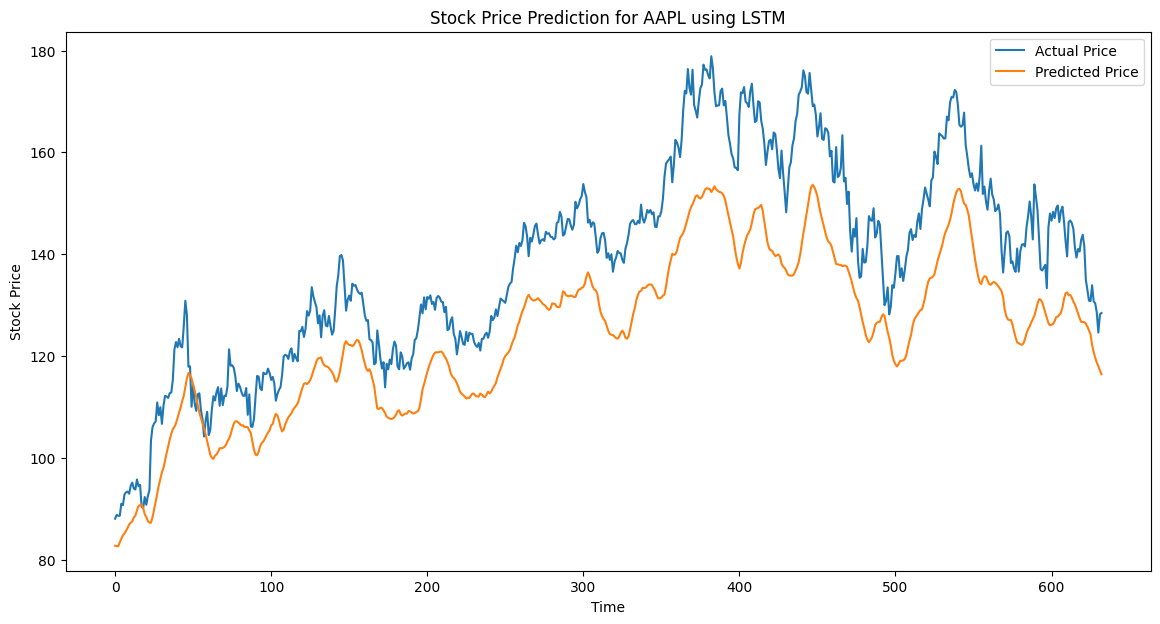

In [3]:
# 7. Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(predictions_inv, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Prediction for {ticker} using LSTM')
plt.legend()
plt.show()